## Optimizing LSTM using Genetic Algorithm 

#### Importing required packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers import LSTM, Input, Dense
from keras.models import Sequential
from keras.layers import *
from keras.models import Model

from deap import base, creator, tools, algorithms
from scipy.stats import bernoulli
from bitstring import BitArray
import operator
import random
from keras.callbacks import EarlyStopping
import time

np.random.seed(1120)
import warnings
warnings.filterwarnings('ignore')

C:\Users\Ali\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Ali\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


#### LBNL_Building74

In [9]:
# SingleSequence Model Inputs (SS)
df=pd.read_excel('lbnl.xlsx')
dataset = df.Consumption.values #numpy.ndarray
dataset=dataset[:30000]
dataset = dataset.astype('float32')
dataset=np.reshape(dataset,[len(dataset),1])
print(dataset.shape)
print(type(dataset))

(30000, 1)
<class 'numpy.ndarray'>


### Scaling

In [10]:
np.random.seed(7)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [11]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
#train_size = int(len(dataset) * (0.72))
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

24000 6000


## Defining Functions

In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
ga_individual_solution=toolbox.individual()
act1 = ga_individual_solution[19:21]
print(act1)
type(act1)

In [ ]:
# Working
ga_individual_solution=toolbox.individual()
print(ga_individual_solution)
window_size_bits = BitArray(ga_individual_solution[0:6])
#num_units_bits = BitArray(ga_individual_solution[6:12]) 
print(window_size_bits)
print(window_size_bits.uint)
#print(num_units_bits)
#print(num_units_bits.uint)

In [ ]:
toolbox.register()

In [ ]:
a,b=toolbox.population(2)
print(a,b)
for i in a,b:
    toolbox.register('mate', tools.cxOnePoint)
    toolbox.mate(a[:5],b[:5])

In [ ]:
a,b=toolbox.population(2)
print(a,b)
toolbox.register('mate', tools.cxOnePoint)
toolbox.mate(a,b)

In [ ]:
l = [1,1]
num = int(''.join(str(x) for x in l), base=2)
num

In [ ]:
a=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6', 
   1, 1, 1, 1, 1, 1, 1, 't0', 't1', 'z0','z1']

b=['a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1',  'bx1', 'bx2', 'bx3', 'bx4', 'bx5', 'bx6',
   0, 0, 0, 0, 0, 0, 0, 't2', 't3', 'z2','z3']

a4=a[20:22]
a4=len(a4)
cp5 = random.randint(1, a4 - 1)
cp5

In [ ]:
toolbox.population(2)

### Modified Crossover

In [ ]:
def MulPoint(ind1, ind2):
    mergedlist1 = []
    mergedlist2 = []
    
    
    a1=ind1[:7]
    b1=ind2[:7]
    size1 = min(len(ind1[:7]), len(ind2[:7]))
    cp1 = random.randint(1, size1 - 1)
    #print(cp1)
    a1[cp1:], b1[cp1:] = b1[cp1:], a1[cp1:]
    mergedlist1.extend(a1)
    mergedlist2.extend(b1)
    

    a2=ind1[7:13]
    b2=ind2[7:13]
    size2 = min(len(ind1[7:13]), len(ind2[7:13]))
    cp2 = random.randint(1, size2 - 1)
    #print(cp2)
    a2[cp2:], b2[cp2:] = b2[cp2:], a2[cp2:]
    mergedlist1.extend(a2)
    mergedlist2.extend(b2)


    a3=ind1[13:20]
    b3=ind2[13:20]
    size3 = min(len(ind1[13:20]), len(ind2[13:20]))
    cp3 = random.randint(1, size3 - 1)
    #print(cp3)
    a3[cp3:], b3[cp3:] = b3[cp3:], a3[cp3:]
    mergedlist1.extend(a3)
    mergedlist2.extend(b3)


    a4=ind1[20:22]
    b4=ind2[20:22]
    size4 = min(len(ind1[20:22]), len(ind2[20:22]))
    cp4 = random.randint(1, size4 - 1)
    #print(cp4)
    a4[cp4:], b4[cp4:] = b4[cp4:], a4[cp4:]
    mergedlist1.extend(a4)
    mergedlist2.extend(b4)



    a5=ind1[22:24]
    b5=ind2[22:24]
    size5 = min(len(ind1[22:24]), len(ind2[22:24]))
    cp5 = random.randint(1, size5 - 1)
    #print(cp5)
    a5[cp5:], b5[cp5:] = b5[cp5:], a5[cp5:]
    mergedlist1.extend(a5)
    mergedlist2.extend(b5)

    return mergedlist1,mergedlist2

In [ ]:
s1,s2=tools.cxUniform(a,b,indpb=0.4)
print(s1,s2)
print(len(s1),len(s2))
print(type(s1),type(s2))

In [6]:
def train_evaluate(ga_individual_solution):   
    # Decode GA solution to integer for window_size and num_units
    
    window_size_bits = BitArray(ga_individual_solution[0:7])
    num_units_bits = BitArray(ga_individual_solution[7:13]) 
    BatchSize_bits = BitArray(ga_individual_solution[13:20]) 
    act = ga_individual_solution[20:22]
    act = int(''.join(str(x) for x in act), base=2)
    
    opt = ga_individual_solution[22:24]
    opt = int(''.join(str(x) for x in opt), base=2)
    
    # Activation Decode
    if act==0:
        act='tanh'
    elif act==1:
        act='relu'
    elif act==2:
        act='selu'
    else:
        act='elu'         

        
    #  Optimizer Decode
    if opt==0:
        opt='sgd'
    elif opt==1:
        opt='RMSprop'
    elif opt==2:
        opt='Adamax'
    else:
        opt='Adam'
        

    window_size = window_size_bits.uint
    num_units = num_units_bits.uint
    batch_size=BatchSize_bits.uint
    
    
    print('\nLag Window Size: ', window_size, ', Number of Units: ',
          num_units, 'Batch Size: ',batch_size, 'Activation Function:',act, 'Optimizer:',opt)
    
    # Return fitness score of 100 if window_size or num_unit is zero
    if window_size == 0 or num_units == 0:
        return 100, 
    
        # reshape into X=t and Y=t+1
    look_back = window_size
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
    testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))
    
    
    
    # Train LSTM model and predict on validation set
    #inputs = Input(shape=(window_size,1))
    model = Sequential() # New Instance of Model Object
    model.add(LSTM(num_units, input_shape=(look_back,1)))
    model.add(Dense(30, activation=act))
    model.add(Dense(10, activation=act))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=opt,loss='mean_squared_error')
    #model.fit(trainX, trainY, epochs=1, batch_size=10,shuffle=True)
    
    start = time.time()
    model.fit(trainX, trainY, epochs=1, shuffle=True,batch_size=batch_size, validation_data=(testX, testY), 
                callbacks=[EarlyStopping(monitor='val_loss', patience=20)], verbose=1)
    
    y_pred = model.predict(testX)
    end = time.time()
    
    # Calculate the RMSE score as fitness score for GA
    rmse = np.sqrt(mean_squared_error(testY, y_pred))
    print('Validation RMSE: ', rmse,'\n')
    print ("Model took %0.2f seconds to train"%(end - start))
    
    return rmse,

In [27]:
# Default train_evaluate
def train_evaluate(ga_individual_solution):   
    # Decode GA solution to integer for window_size and num_units
    
    window_size_bits = BitArray(ga_individual_solution[0:6])
    num_units_bits = BitArray(ga_individual_solution[6:12]) 
    BatchSize_bits = BitArray(ga_individual_solution[12:19]) 
    act = BitArray(ga_individual_solution[19:21]) 
    opt = BitArray(ga_individual_solution[21:23]) 
    
    # Activation Decode
    if act==BitArray('0b00'):
        act='tanh'
    elif act==BitArray('0b111'):
        act='relu'
    elif act==BitArray('0b011'):
        act='selu'
    else:
        act='elu'         

        
    #  Optimizer Decode
    if opt==BitArray('0b00'):
        opt='sgd'
    elif opt==BitArray('0b111'):
        opt='RMSprop'
    elif opt==BitArray('0b011'):
        opt='Adamax'
    else:
        opt='Adam'
        

    window_size = window_size_bits.uint
    num_units = num_units_bits.uint
    batch_size=BatchSize_bits.uint
    
    
    print('\nLag Window Size: ', window_size, ', Number of Units: ',
          num_units, 'Batch Size: ',batch_size, 'Activation Function:',act, 'Optimizer:',opt)
    
    # Return fitness score of 100 if window_size or num_unit is zero
    if window_size == 0 or num_units == 0:
        return 100, 
    
        # reshape into X=t and Y=t+1
    look_back = window_size
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
    testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))
    
    
    
    # Train LSTM model and predict on validation set
    #inputs = Input(shape=(window_size,1))
    model = Sequential() # New Instance of Model Object
    model.add(LSTM(num_units, input_shape=(look_back,1)))
    model.add(Dense(30, activation=act))
    model.add(Dense(10, activation=act))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=opt,loss='mean_squared_error')
    #model.fit(trainX, trainY, epochs=1, batch_size=10,shuffle=True)
    
    start = time.time()
    model.fit(trainX, trainY, epochs=100, shuffle=True,batch_size=batch_size, validation_data=(testX, testY), 
                callbacks=[EarlyStopping(monitor='val_loss', patience=20)], verbose=1)
    
    y_pred = model.predict(testX)
    end = time.time()
    
    # Calculate the RMSE score as fitness score for GA
    rmse = np.sqrt(mean_squared_error(testY, y_pred))
    print('Validation RMSE: ', rmse,'\n')
    print ("Model took %0.2f seconds to train"%(end - start))
    
    return rmse,

In [2]:
# As we are trying to minimize the RMSE score, that's why using -1.0. 
# In case, when you want to maximize accuracy for instance, use 1.0
creator.create('FitnessMin', base.Fitness, weights = (-1.0,))
creator.create('Individual', list , fitness = creator.FitnessMin)

In [3]:
# Rough
print((list))
print(type(creator.FitnessMin()))
print(type(creator.Individual()))
base.Fitness

<class 'list'>
<class 'deap.creator.FitnessMin'>
<class 'deap.creator.Individual'>


deap.base.Fitness

In [ ]:
# Rough 
random.randint(5,50)
part = creator.Individual(random.randint(5, 50) for _ in range(5))
print(type(part))
print(part)

In [14]:
population_size = 5
toolbox.population(3)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]]

In [11]:
# self
population_size = 5
num_generations = 20
gene_length = 24


toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1) #Generates single RAND
toolbox.register('individual', tools.initRepeat, creator.Individual,
                 toolbox.attr_bool, n=gene_length)
toolbox.register('population', tools.initRepeat, list , toolbox.individual)

In [16]:
population_size = 5
num_generations = 3
gene_length = 24


toolbox = base.Toolbox()
toolbox.register('binary', bernoulli.rvs, 0.5) #Generates single bernoulli
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.binary, n=gene_length)
toolbox.register('population', tools.initRepeat, list , toolbox.individual)

In [ ]:
# Rough
toolbox.population(5)

## Algorithm

*deap.algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen[, stats, halloffame, verbose])*

In [12]:
toolbox.register('mate', tools.cxUniform,indpb= 0.6)
toolbox.register('mutate', tools.mutShuffleIndexes, indpb = 0.2)
toolbox.register('select', tools.selRoulette)
#toolbox.register('evaluate', train_evaluate)

population = toolbox.population(n = population_size)

In [31]:
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen = num_generations,
                                       stats=stats, halloffame=hof, verbose=True)


Lag Window Size:  38 , Number of Units:  11 Batch Size:  119 Activation Function: elu Optimizer: Adam
Train on 23961 samples, validate on 5961 samples
Epoch 1/100
23961/23961 [==============================] - 8s 333us/step - loss: 0.0226 - val_loss: 0.0051
Epoch 2/100
23961/23961 [==============================] - 3s 121us/step - loss: 0.0037 - val_loss: 0.0032
Epoch 3/100
23961/23961 [==============================] - 3s 118us/step - loss: 0.0026 - val_loss: 0.0022
Epoch 4/100
23961/23961 [==============================] - 3s 121us/step - loss: 0.0019 - val_loss: 0.0017
Epoch 5/100
23961/23961 [==============================] - 3s 119us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/100
23961/23961 [==============================] - 3s 119us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 7/100
23961/23961 [==============================] - 3s 120us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 8/100
23961/23961 [==============================] - 3s 122us/step - loss: 0.0016 - val_loss:

23971/23971 [==============================] - 10s 400us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 49/100
23971/23971 [==============================] - 10s 401us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 50/100
23971/23971 [==============================] - 10s 399us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 51/100
23971/23971 [==============================] - 10s 401us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 52/100
23971/23971 [==============================] - 10s 397us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 53/100
23971/23971 [==============================] - 10s 437us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 54/100
23971/23971 [==============================] - 10s 417us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 55/100
23971/23971 [==============================] - 10s 397us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 56/100
23971/23971 [==============================] - 10s 403us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 57/100
23971/23971 [======

Epoch 50/100
23958/23958 [==============================] - 5s 191us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 51/100
23958/23958 [==============================] - 5s 191us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 52/100
23958/23958 [==============================] - 5s 197us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 53/100
23958/23958 [==============================] - 5s 191us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 54/100
23958/23958 [==============================] - 5s 192us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 55/100
23958/23958 [==============================] - 5s 191us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 56/100
23958/23958 [==============================] - 5s 195us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 57/100
23958/23958 [==============================] - 5s 190us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 58/100
23958/23958 [==============================] - 5s 195us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 59/100
23958/23958 [==

Epoch 24/100
23946/23946 [==============================] - 4s 163us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 25/100
23946/23946 [==============================] - 4s 164us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 26/100
23946/23946 [==============================] - 4s 160us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 27/100
23946/23946 [==============================] - 4s 160us/step - loss: 0.0015 - val_loss: 0.0018
Epoch 28/100
23946/23946 [==============================] - 4s 160us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 29/100
23946/23946 [==============================] - 4s 162us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 30/100
23946/23946 [==============================] - 4s 162us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 31/100
23946/23946 [==============================] - 4s 160us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 32/100
23946/23946 [==============================] - 4s 160us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 33/100
23946/23946 [==

Epoch 100/100
23946/23946 [==============================] - 4s 159us/step - loss: 0.0015 - val_loss: 0.0015
Validation RMSE:  0.038426444 

Model took 400.07 seconds to train

Lag Window Size:  27 , Number of Units:  32 Batch Size:  53 Activation Function: elu Optimizer: Adam
Train on 23972 samples, validate on 5972 samples
Epoch 1/100
23972/23972 [==============================] - 10s 416us/step - loss: 0.0062 - val_loss: 0.0022
Epoch 2/100
23972/23972 [==============================] - 5s 192us/step - loss: 0.0019 - val_loss: 0.0017
Epoch 3/100
23972/23972 [==============================] - 5s 192us/step - loss: 0.0017 - val_loss: 0.0015
Epoch 4/100
23972/23972 [==============================] - 5s 193us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 5/100
23972/23972 [==============================] - 5s 198us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 6/100
23972/23972 [==============================] - 5s 193us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/100
23972/23972 [=====

Epoch 16/100
23989/23989 [==============================] - 4s 184us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 17/100
23989/23989 [==============================] - 4s 183us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 18/100
23989/23989 [==============================] - 4s 181us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 19/100
23989/23989 [==============================] - 4s 181us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 20/100
23989/23989 [==============================] - 4s 186us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 21/100
23989/23989 [==============================] - 4s 181us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 22/100
23989/23989 [==============================] - 4s 181us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 23/100
23989/23989 [==============================] - 4s 181us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 24/100
23989/23989 [==============================] - 4s 186us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 25/100
23989/23989 [==

23982/23982 [==============================] - 9s 381us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 32/100
23982/23982 [==============================] - 9s 376us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 33/100
23982/23982 [==============================] - 9s 380us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 34/100
23982/23982 [==============================] - 9s 377us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 35/100
23982/23982 [==============================] - 9s 382us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 36/100
23982/23982 [==============================] - 9s 376us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 37/100
23982/23982 [==============================] - 9s 380us/step - loss: 0.0014 - val_loss: 0.0017
Epoch 38/100
23982/23982 [==============================] - 9s 394us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 39/100
23982/23982 [==============================] - 9s 375us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 40/100
23982/23982 [===============

23991/23991 [==============================] - 3s 111us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 54/100
23991/23991 [==============================] - 3s 112us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 55/100
23991/23991 [==============================] - 3s 112us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 56/100
23991/23991 [==============================] - 3s 117us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 57/100
23991/23991 [==============================] - 3s 121us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 58/100
23991/23991 [==============================] - 3s 135us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 59/100
23991/23991 [==============================] - 3s 132us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 60/100
23991/23991 [==============================] - 3s 121us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 61/100
23991/23991 [==============================] - 3s 121us/step - loss: 0.0014 - val_loss: 0.0014
Validation RMSE:  0.037796285 

Model too

23990/23990 [==============================] - 2s 75us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 39/100
23990/23990 [==============================] - 2s 81us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 40/100
23990/23990 [==============================] - 2s 75us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 41/100
23990/23990 [==============================] - 2s 75us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 42/100
23990/23990 [==============================] - 2s 74us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 43/100
23990/23990 [==============================] - 2s 72us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 44/100
23990/23990 [==============================] - 2s 73us/step - loss: 0.0023 - val_loss: 0.0023
Epoch 45/100
23990/23990 [==============================] - 2s 74us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 46/100
23990/23990 [==============================] - 2s 74us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 47/100
23990/23990 [========================

23991/23991 [==============================] - 2s 85us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 89/100
23991/23991 [==============================] - 2s 85us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 90/100
23991/23991 [==============================] - 2s 84us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 91/100
23991/23991 [==============================] - 2s 84us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 92/100
23991/23991 [==============================] - 2s 89us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 93/100
23991/23991 [==============================] - 2s 85us/step - loss: 0.0014 - val_loss: 0.0014
Validation RMSE:  0.037738007 

Model took 196.29 seconds to train

Lag Window Size:  27 , Number of Units:  36 Batch Size:  37 Activation Function: elu Optimizer: Adam
Train on 23972 samples, validate on 5972 samples
Epoch 1/100
23972/23972 [==============================] - 14s 571us/step - loss: 0.0058 - val_loss: 0.0018
Epoch 2/100
23972/23972 [====================

23991/23991 [==============================] - 4s 180us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 39/100
23991/23991 [==============================] - 4s 180us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 40/100
23991/23991 [==============================] - 4s 181us/step - loss: 0.0014 - val_loss: 0.0018
Epoch 41/100
23991/23991 [==============================] - 4s 186us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 42/100
23991/23991 [==============================] - 4s 185us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 43/100
23991/23991 [==============================] - 4s 184us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 44/100
23991/23991 [==============================] - 4s 185us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 45/100
23991/23991 [==============================] - 4s 187us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 46/100
23991/23991 [==============================] - 4s 183us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 47/100
23991/23991 [===============

23989/23989 [==============================] - 2s 87us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 62/100
23989/23989 [==============================] - 2s 84us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 63/100
23989/23989 [==============================] - 2s 84us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 64/100
23989/23989 [==============================] - 2s 83us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 65/100
23989/23989 [==============================] - 2s 87us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 66/100
23989/23989 [==============================] - 2s 91us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 67/100
23989/23989 [==============================] - 2s 87us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 68/100
23989/23989 [==============================] - 2s 83us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 69/100
23989/23989 [==============================] - 2s 93us/step - loss: 0.0014 - val_loss: 0.0015
Validation RMSE:  0.038115893 

Model took 152.94 

23989/23989 [==============================] - 1s 50us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 49/100
23989/23989 [==============================] - 1s 49us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 50/100
23989/23989 [==============================] - 1s 49us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 51/100
23989/23989 [==============================] - 1s 50us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 52/100
23989/23989 [==============================] - 1s 49us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 53/100
23989/23989 [==============================] - 1s 49us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 54/100
23989/23989 [==============================] - 1s 49us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 55/100
23989/23989 [==============================] - 1s 51us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 56/100
23989/23989 [==============================] - 1s 56us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 57/100
23989/23989 [========================

23972/23972 [==============================] - 8s 315us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 14/100
23972/23972 [==============================] - 8s 325us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 15/100
23972/23972 [==============================] - 7s 308us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 16/100
23972/23972 [==============================] - 8s 318us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 17/100
23972/23972 [==============================] - 8s 330us/step - loss: 0.0015 - val_loss: 0.0013
Epoch 18/100
23972/23972 [==============================] - 8s 323us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 19/100
23972/23972 [==============================] - 7s 306us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 20/100
23972/23972 [==============================] - 8s 332us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 21/100
23972/23972 [==============================] - 7s 312us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 22/100
23972/23972 [===============

23987/23987 [==============================] - 4s 159us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 51/100
23987/23987 [==============================] - 4s 146us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 52/100
23987/23987 [==============================] - 4s 146us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 53/100
23987/23987 [==============================] - 4s 149us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 54/100
23987/23987 [==============================] - 4s 158us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 55/100
23987/23987 [==============================] - 4s 153us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 56/100
23987/23987 [==============================] - 4s 148us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 57/100
23987/23987 [==============================] - 4s 148us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 58/100
23987/23987 [==============================] - 4s 151us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 59/100
23987/23987 [===============

23969/23969 [==============================] - 8s 348us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 33/100
23969/23969 [==============================] - 9s 363us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 34/100
23969/23969 [==============================] - 9s 365us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 35/100
23969/23969 [==============================] - 9s 360us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 36/100
23969/23969 [==============================] - 8s 354us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 37/100
23969/23969 [==============================] - 9s 362us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 38/100
23969/23969 [==============================] - 9s 355us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 39/100
23969/23969 [==============================] - 8s 352us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 40/100
23969/23969 [==============================] - 8s 347us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 41/100
23969/23969 [===============

Epoch 15/100
23973/23973 [==============================] - 11s 449us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 16/100
23973/23973 [==============================] - 11s 465us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 17/100
23973/23973 [==============================] - 11s 457us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 18/100
23973/23973 [==============================] - 11s 447us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 19/100
23973/23973 [==============================] - 11s 450us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 20/100
23973/23973 [==============================] - 11s 444us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 21/100
23973/23973 [==============================] - 10s 430us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 22/100
23973/23973 [==============================] - 11s 445us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 23/100
23973/23973 [==============================] - 11s 472us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 24/100
23973/

23988/23988 [==============================] - 4s 163us/step - loss: 0.0018 - val_loss: 0.0016
Epoch 3/100
23988/23988 [==============================] - 4s 169us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/100
23988/23988 [==============================] - 4s 162us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/100
23988/23988 [==============================] - 4s 162us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 6/100
23988/23988 [==============================] - 4s 162us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/100
23988/23988 [==============================] - 4s 169us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 8/100
23988/23988 [==============================] - 4s 165us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/100
23988/23988 [==============================] - 4s 165us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 10/100
23988/23988 [==============================] - 4s 164us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 11/100
23988/23988 [======================

23988/23988 [==============================] - 3s 113us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 32/100
23988/23988 [==============================] - 3s 117us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 33/100
23988/23988 [==============================] - 3s 113us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 34/100
23988/23988 [==============================] - 3s 112us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 35/100
23988/23988 [==============================] - 3s 113us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 36/100
23988/23988 [==============================] - 3s 113us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 37/100
23988/23988 [==============================] - 3s 113us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 38/100
23988/23988 [==============================] - 3s 117us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 39/100
23988/23988 [==============================] - 3s 112us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 40/100
23988/23988 [===============

23988/23988 [==============================] - 4s 184us/step - loss: 0.0014 - val_loss: 0.0017
Epoch 38/100
23988/23988 [==============================] - 4s 184us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 39/100
23988/23988 [==============================] - 5s 190us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 40/100
23988/23988 [==============================] - 4s 185us/step - loss: 0.0014 - val_loss: 0.0017
Epoch 41/100
23988/23988 [==============================] - 4s 184us/step - loss: 0.0014 - val_loss: 0.0017
Epoch 42/100
23988/23988 [==============================] - 4s 185us/step - loss: 0.0014 - val_loss: 0.0016
Validation RMSE:  0.04033003 

Model took 202.77 seconds to train

Lag Window Size:  11 , Number of Units:  44 Batch Size:  37 Activation Function: tanh Optimizer: Adam
Train on 23988 samples, validate on 5988 samples
Epoch 1/100
23988/23988 [==============================] - 13s 542us/step - loss: 0.0046 - val_loss: 0.0020
Epoch 2/100
23988/23988 [==============

Epoch 25/100
23957/23957 [==============================] - 13s 528us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 26/100
23957/23957 [==============================] - 13s 530us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 27/100
23957/23957 [==============================] - 13s 549us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 28/100
23957/23957 [==============================] - 13s 559us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 29/100
23957/23957 [==============================] - 13s 527us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 30/100
23957/23957 [==============================] - 12s 517us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 31/100
23957/23957 [==============================] - 12s 519us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 32/100
23957/23957 [==============================] - 12s 508us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 33/100
23957/23957 [==============================] - 12s 515us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 34/100
23957/

23991/23991 [==============================] - 5s 196us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 23/100
23991/23991 [==============================] - 5s 194us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 24/100
23991/23991 [==============================] - 5s 195us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 25/100
23991/23991 [==============================] - 5s 198us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 26/100
23991/23991 [==============================] - 5s 201us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 27/100
23991/23991 [==============================] - 5s 195us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 28/100
23991/23991 [==============================] - 5s 206us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 29/100
23991/23991 [==============================] - 5s 209us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 30/100
23991/23991 [==============================] - 5s 195us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 31/100
23991/23991 [===============

23972/23972 [==============================] - 9s 388us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 28/100
23972/23972 [==============================] - 9s 374us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 29/100
23972/23972 [==============================] - 9s 380us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 30/100
23972/23972 [==============================] - 9s 374us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 31/100
23972/23972 [==============================] - 9s 359us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 32/100
23972/23972 [==============================] - 9s 358us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 33/100
23972/23972 [==============================] - 8s 347us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 34/100
23972/23972 [==============================] - 9s 361us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 35/100
23972/23972 [==============================] - 8s 337us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 36/100
23972/23972 [===============

23956/23956 [==============================] - 5s 209us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 15/100
23956/23956 [==============================] - 5s 210us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 16/100
23956/23956 [==============================] - 5s 215us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 17/100
23956/23956 [==============================] - 5s 205us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 18/100
23956/23956 [==============================] - 5s 196us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 19/100
23956/23956 [==============================] - 5s 200us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 20/100
23956/23956 [==============================] - 5s 197us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 21/100
23956/23956 [==============================] - 5s 208us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 22/100
23956/23956 [==============================] - 5s 229us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 23/100
23956/23956 [===============

23995/23995 [==============================] - 2s 68us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 36/100
23995/23995 [==============================] - 2s 67us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 37/100
23995/23995 [==============================] - 2s 70us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 38/100
23995/23995 [==============================] - 2s 69us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 39/100
23995/23995 [==============================] - 2s 71us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 40/100
23995/23995 [==============================] - 2s 71us/step - loss: 0.0015 - val_loss: 0.0015
Validation RMSE:  0.03899755 

Model took 79.63 seconds to train

Lag Window Size:  8 , Number of Units:  12 Batch Size:  47 Activation Function: elu Optimizer: Adam
Train on 23991 samples, validate on 5991 samples
Epoch 1/100
23991/23991 [==============================] - 12s 496us/step - loss: 0.0127 - val_loss: 0.0030
Epoch 2/100
23991/23991 [=======================

23991/23991 [==============================] - 4s 177us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 49/100
23991/23991 [==============================] - 4s 175us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 50/100
23991/23991 [==============================] - 4s 181us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 51/100
23991/23991 [==============================] - 4s 181us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 52/100
23991/23991 [==============================] - 5s 188us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 53/100
23991/23991 [==============================] - 5s 188us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 54/100
23991/23991 [==============================] - 5s 202us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 55/100
23991/23991 [==============================] - 4s 181us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 56/100
23991/23991 [==============================] - 4s 169us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 57/100
23991/23991 [===============

23984/23984 [==============================] - 2s 103us/step - loss: 0.0021 - val_loss: 0.0019
Epoch 3/100
23984/23984 [==============================] - 2s 103us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4/100
23984/23984 [==============================] - 2s 103us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 5/100
23984/23984 [==============================] - 2s 103us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/100
23984/23984 [==============================] - 2s 103us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7/100
23984/23984 [==============================] - 3s 107us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/100
23984/23984 [==============================] - 2s 103us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/100
23984/23984 [==============================] - 2s 103us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/100
23984/23984 [==============================] - 3s 105us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 11/100
23984/23984 [======================

23988/23988 [==============================] - 4s 180us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 17/100
23988/23988 [==============================] - 4s 180us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 18/100
23988/23988 [==============================] - 4s 187us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 19/100
23988/23988 [==============================] - 4s 179us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 20/100
23988/23988 [==============================] - 4s 181us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 21/100
23988/23988 [==============================] - 4s 180us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 22/100
23988/23988 [==============================] - 4s 185us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 23/100
23988/23988 [==============================] - 4s 179us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 24/100
23988/23988 [==============================] - 4s 180us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 25/100
23988/23988 [===============

23972/23972 [==============================] - 7s 312us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 45/100
23972/23972 [==============================] - 7s 307us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 46/100
23972/23972 [==============================] - 7s 311us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 47/100
23972/23972 [==============================] - 7s 309us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 48/100
23972/23972 [==============================] - 7s 310us/step - loss: 0.0013 - val_loss: 0.0017
Epoch 49/100
23972/23972 [==============================] - 7s 310us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 50/100
23972/23972 [==============================] - 7s 307us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 51/100
23972/23972 [==============================] - 7s 312us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 52/100
23972/23972 [==============================] - 7s 307us/step - loss: 0.0013 - val_loss: 0.0018
Epoch 53/100
23972/23972 [===============

23972/23972 [==============================] - 4s 146us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 32/100
23972/23972 [==============================] - 3s 146us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 33/100
23972/23972 [==============================] - 4s 150us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 34/100
23972/23972 [==============================] - 4s 146us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 35/100
23972/23972 [==============================] - 3s 146us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 36/100
23972/23972 [==============================] - 4s 148us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 37/100
23972/23972 [==============================] - 4s 149us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 38/100
23972/23972 [==============================] - 4s 147us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 39/100
23972/23972 [==============================] - 3s 146us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 40/100
23972/23972 [===============

Epoch 41/100
23964/23964 [==============================] - 9s 378us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 42/100
23964/23964 [==============================] - 9s 382us/step - loss: 0.0012 - val_loss: 0.0014
Epoch 43/100
23964/23964 [==============================] - 9s 382us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 44/100
23964/23964 [==============================] - 12s 481us/step - loss: 0.0012 - val_loss: 0.0014
Epoch 45/100
23964/23964 [==============================] - 10s 415us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 46/100
23964/23964 [==============================] - 10s 405us/step - loss: 0.0012 - val_loss: 0.0014
Epoch 47/100
23964/23964 [==============================] - 10s 398us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 48/100
23964/23964 [==============================] - 11s 455us/step - loss: 0.0012 - val_loss: 0.0014
Epoch 49/100
23964/23964 [==============================] - 11s 453us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 50/100
23964/239

23956/23956 [==============================] - 12s 516us/step - loss: 0.0010 - val_loss: 0.0013
Epoch 77/100
23956/23956 [==============================] - 13s 527us/step - loss: 0.0010 - val_loss: 0.0013
Epoch 78/100
23956/23956 [==============================] - 13s 546us/step - loss: 9.9413e-04 - val_loss: 0.0012
Epoch 79/100
23956/23956 [==============================] - 13s 555us/step - loss: 9.8632e-04 - val_loss: 0.0011
Epoch 80/100
23956/23956 [==============================] - 13s 539us/step - loss: 9.6502e-04 - val_loss: 0.0012
Epoch 81/100
23956/23956 [==============================] - 12s 508us/step - loss: 9.8452e-04 - val_loss: 0.0012
Epoch 82/100
23956/23956 [==============================] - 12s 518us/step - loss: 9.6674e-04 - val_loss: 0.0012
Epoch 83/100
23956/23956 [==============================] - 13s 552us/step - loss: 9.6407e-04 - val_loss: 0.0012
Epoch 84/100
23956/23956 [==============================] - 14s 585us/step - loss: 9.4962e-04 - val_loss: 0.0012
Epoc

Epoch 49/100
23997/23997 [==============================] - 3s 140us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 50/100
23997/23997 [==============================] - 4s 150us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 51/100
23997/23997 [==============================] - 3s 128us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 52/100
23997/23997 [==============================] - 3s 125us/step - loss: 0.0015 - val_loss: 0.0016
Validation RMSE:  0.039743308 

Model took 182.17 seconds to train

Lag Window Size:  41 , Number of Units:  35 Batch Size:  36 Activation Function: tanh Optimizer: Adam
Train on 23958 samples, validate on 5958 samples
Epoch 1/100
23958/23958 [==============================] - 23s 954us/step - loss: 0.0048 - val_loss: 0.0018
Epoch 2/100
23958/23958 [==============================] - 11s 477us/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/100
23958/23958 [==============================] - 12s 486us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4/100
23958/23958 [

23964/23964 [==============================] - 5s 192us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 57/100
23964/23964 [==============================] - 4s 182us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 58/100
23964/23964 [==============================] - 5s 190us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 59/100
23964/23964 [==============================] - 5s 192us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 60/100
23964/23964 [==============================] - 4s 184us/step - loss: 0.0013 - val_loss: 0.0016
Validation RMSE:  0.039773025 

Model took 292.60 seconds to train

Lag Window Size:  9 , Number of Units:  47 Batch Size:  13 Activation Function: tanh Optimizer: Adam
Train on 23990 samples, validate on 5990 samples
Epoch 1/100
23990/23990 [==============================] - 23s 963us/step - loss: 0.0024 - val_loss: 0.0018
Epoch 2/100
23990/23990 [==============================] - 12s 517us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/100
23990/23990 [==============

23984/23984 [==============================] - 6s 253us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 19/100
23984/23984 [==============================] - 6s 239us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 20/100
23984/23984 [==============================] - 6s 245us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 21/100
23984/23984 [==============================] - 6s 254us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 22/100
23984/23984 [==============================] - 6s 237us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 23/100
23984/23984 [==============================] - 6s 246us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 24/100
23984/23984 [==============================] - 6s 241us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 25/100
23984/23984 [==============================] - 6s 239us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 26/100
23984/23984 [==============================] - 6s 237us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 27/100
23984/23984 [===============

23990/23990 [==============================] - 4s 152us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/100
23990/23990 [==============================] - 4s 147us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/100
23990/23990 [==============================] - 4s 147us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 10/100
23990/23990 [==============================] - 4s 149us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 11/100
23990/23990 [==============================] - 4s 158us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 12/100
23990/23990 [==============================] - 4s 165us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 13/100
23990/23990 [==============================] - 3s 145us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 14/100
23990/23990 [==============================] - 3s 145us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 15/100
23990/23990 [==============================] - 4s 148us/step - loss: 0.0016 - val_loss: 0.0021
Epoch 16/100
23990/23990 [=================

23997/23997 [==============================] - 18s 747us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7/100
23997/23997 [==============================] - 18s 745us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/100
23997/23997 [==============================] - 18s 753us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/100
23997/23997 [==============================] - 18s 740us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 10/100
23997/23997 [==============================] - 18s 745us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 11/100
23997/23997 [==============================] - 18s 743us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 12/100
23997/23997 [==============================] - 18s 740us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 13/100
23997/23997 [==============================] - 18s 746us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 14/100
23997/23997 [==============================] - 18s 742us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 15/100
23997/23997 [=========

23956/23956 [==============================] - 5s 215us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 60/100
23956/23956 [==============================] - 5s 209us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 61/100
23956/23956 [==============================] - 5s 210us/step - loss: 0.0012 - val_loss: 0.0013
Validation RMSE:  0.03568561 

Model took 324.63 seconds to train

Lag Window Size:  27 , Number of Units:  36 Batch Size:  36 Activation Function: elu Optimizer: Adam
Train on 23972 samples, validate on 5972 samples
Epoch 1/100
23972/23972 [==============================] - 18s 759us/step - loss: 0.0060 - val_loss: 0.0017
Epoch 2/100
23972/23972 [==============================] - 8s 332us/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/100
23972/23972 [==============================] - 8s 335us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/100
23972/23972 [==============================] - 8s 333us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/100
23972/23972 [==================

23996/23996 [==============================] - 3s 130us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 28/100
23996/23996 [==============================] - 3s 129us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 29/100
23996/23996 [==============================] - 3s 134us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 30/100
23996/23996 [==============================] - 3s 130us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 31/100
23996/23996 [==============================] - 3s 129us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 32/100
23996/23996 [==============================] - 3s 130us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 33/100
23996/23996 [==============================] - 3s 129us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 34/100
23996/23996 [==============================] - 3s 135us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 35/100
23996/23996 [==============================] - 3s 130us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 36/100
23996/23996 [===============

23987/23987 [==============================] - 5s 205us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 17/100
23987/23987 [==============================] - 5s 204us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 18/100
23987/23987 [==============================] - 5s 211us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 19/100
23987/23987 [==============================] - 5s 205us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 20/100
23987/23987 [==============================] - 5s 206us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 21/100
23987/23987 [==============================] - 5s 210us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 22/100
23987/23987 [==============================] - 5s 207us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 23/100
23987/23987 [==============================] - 5s 205us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 24/100
23987/23987 [==============================] - 5s 211us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 25/100
23987/23987 [===============

Train on 23996 samples, validate on 5996 samples
Epoch 1/100
23996/23996 [==============================] - 13s 562us/step - loss: 0.0054 - val_loss: 0.0020
Epoch 2/100
23996/23996 [==============================] - 3s 119us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3/100
23996/23996 [==============================] - 3s 120us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4/100
23996/23996 [==============================] - 3s 122us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 5/100
23996/23996 [==============================] - 3s 120us/step - loss: 0.0016 - val_loss: 0.0020
Epoch 6/100
23996/23996 [==============================] - 3s 122us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 7/100
23996/23996 [==============================] - 3s 126us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/100
23996/23996 [==============================] - 3s 122us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/100
23996/23996 [==============================] - 3s 122us/step - loss: 0.0016 - val_

23993/23993 [==============================] - 1s 57us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 32/100
23993/23993 [==============================] - 1s 55us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 33/100
23993/23993 [==============================] - 1s 56us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 34/100
23993/23993 [==============================] - 1s 56us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 35/100
23993/23993 [==============================] - 1s 56us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 36/100
23993/23993 [==============================] - 1s 62us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 37/100
23993/23993 [==============================] - 1s 56us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 38/100
23993/23993 [==============================] - 1s 56us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 39/100
23993/23993 [==============================] - 1s 56us/step - loss: 0.0015 - val_loss: 0.0014
Validation RMSE:  0.037437283 

Model took 68.87 s

Train on 23996 samples, validate on 5996 samples
Epoch 1/100
23996/23996 [==============================] - 14s 566us/step - loss: 0.0115 - val_loss: 0.0076
Epoch 2/100
23996/23996 [==============================] - 3s 114us/step - loss: 0.0044 - val_loss: 0.0032
Epoch 3/100
23996/23996 [==============================] - 3s 121us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 4/100
23996/23996 [==============================] - 3s 115us/step - loss: 0.0019 - val_loss: 0.0020
Epoch 5/100
23996/23996 [==============================] - 3s 115us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 6/100
23996/23996 [==============================] - 3s 116us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/100
23996/23996 [==============================] - 3s 116us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/100
23996/23996 [==============================] - 3s 115us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 9/100
23996/23996 [==============================] - 3s 120us/step - loss: 0.0019 - val_

23996/23996 [==============================] - 3s 131us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 51/100
23996/23996 [==============================] - 3s 134us/step - loss: 0.0015 - val_loss: 0.0016
Validation RMSE:  0.039575923 

Model took 176.25 seconds to train

Lag Window Size:  12 , Number of Units:  37 Batch Size:  37 Activation Function: elu Optimizer: Adam
Train on 23987 samples, validate on 5987 samples
Epoch 1/100
23987/23987 [==============================] - 16s 660us/step - loss: 0.0063 - val_loss: 0.0018
Epoch 2/100
23987/23987 [==============================] - 5s 193us/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/100
23987/23987 [==============================] - 5s 193us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4/100
23987/23987 [==============================] - 5s 199us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/100
23987/23987 [==============================] - 5s 194us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/100
23987/23987 [==================

23987/23987 [==============================] - 5s 196us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 74/100
23987/23987 [==============================] - 5s 193us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 75/100
23987/23987 [==============================] - 5s 197us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 76/100
23987/23987 [==============================] - 5s 196us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 77/100
23987/23987 [==============================] - 5s 193us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 78/100
23987/23987 [==============================] - 5s 194us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 79/100
23987/23987 [==============================] - 5s 198us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 80/100
23987/23987 [==============================] - 5s 194us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 81/100
23987/23987 [==============================] - 5s 193us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 82/100
23987/23987 [===============

23984/23984 [==============================] - 6s 231us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 64/100
23984/23984 [==============================] - 6s 232us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 65/100
23984/23984 [==============================] - 6s 237us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 66/100
23984/23984 [==============================] - 6s 232us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 67/100
23984/23984 [==============================] - 6s 234us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 68/100
23984/23984 [==============================] - 6s 237us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 69/100
23984/23984 [==============================] - 6s 234us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 70/100
23984/23984 [==============================] - 6s 236us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 71/100
23984/23984 [==============================] - 6s 234us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 72/100
23984/23984 [===============

23980/23980 [==============================] - 6s 265us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 38/100
23980/23980 [==============================] - 6s 269us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 39/100
23980/23980 [==============================] - 7s 271us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 40/100
23980/23980 [==============================] - 6s 267us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 41/100
23980/23980 [==============================] - 7s 271us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 42/100
23980/23980 [==============================] - 6s 266us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 43/100
23980/23980 [==============================] - 6s 268us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 44/100
23980/23980 [==============================] - 6s 270us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 45/100
23980/23980 [==============================] - 6s 266us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 46/100
23980/23980 [===============

Epoch 47/100
23988/23988 [==============================] - 5s 200us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 48/100
23988/23988 [==============================] - 5s 195us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 49/100
23988/23988 [==============================] - 5s 195us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 50/100
23988/23988 [==============================] - 5s 195us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 51/100
23988/23988 [==============================] - 5s 199us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 52/100
23988/23988 [==============================] - 5s 195us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 53/100
23988/23988 [==============================] - 5s 194us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 54/100
23988/23988 [==============================] - 5s 200us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 55/100
23988/23988 [==============================] - 5s 200us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 56/100
23988/23988 [==

Epoch 21/100
23976/23976 [==============================] - 8s 345us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 22/100
23976/23976 [==============================] - 8s 348us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 23/100
23976/23976 [==============================] - 8s 343us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 24/100
23976/23976 [==============================] - 8s 348us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 25/100
23976/23976 [==============================] - 8s 344us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 26/100
23976/23976 [==============================] - 8s 348us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 27/100
23976/23976 [==============================] - 8s 342us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 28/100
23976/23976 [==============================] - 8s 348us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 29/100
23976/23976 [==============================] - 8s 343us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 30/100
23976/23976 [==

Epoch 15/100
23984/23984 [==============================] - 6s 257us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 16/100
23984/23984 [==============================] - 6s 256us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 17/100
23984/23984 [==============================] - 6s 262us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 18/100
23984/23984 [==============================] - 6s 257us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 19/100
23984/23984 [==============================] - 6s 262us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 20/100
23984/23984 [==============================] - 6s 257us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 21/100
23984/23984 [==============================] - 6s 258us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 22/100
23984/23984 [==============================] - 6s 263us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 23/100
23984/23984 [==============================] - 6s 259us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 24/100
23984/23984 [==

Epoch 36/100
23968/23968 [==============================] - 9s 388us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 37/100
23968/23968 [==============================] - 9s 384us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 38/100
23968/23968 [==============================] - 9s 387us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 39/100
23968/23968 [==============================] - 9s 384us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 40/100
23968/23968 [==============================] - 9s 389us/step - loss: 0.0013 - val_loss: 0.0014
Validation RMSE:  0.03721177 

Model took 388.85 seconds to train

Lag Window Size:  31 , Number of Units:  44 Batch Size:  36 Activation Function: elu Optimizer: sgd
Train on 23968 samples, validate on 5968 samples
Epoch 1/100
23968/23968 [==============================] - 21s 884us/step - loss: 0.0125 - val_loss: 0.0070
Epoch 2/100
23968/23968 [==============================] - 9s 381us/step - loss: 0.0046 - val_loss: 0.0042
Epoch 3/100
23968/23968 [====

Epoch 70/100
23968/23968 [==============================] - 9s 382us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 71/100
23968/23968 [==============================] - 9s 387us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 72/100
23968/23968 [==============================] - 9s 386us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 73/100
23968/23968 [==============================] - 9s 383us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 74/100
23968/23968 [==============================] - 9s 385us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 75/100
23968/23968 [==============================] - 9s 379us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 76/100
23968/23968 [==============================] - 9s 385us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 77/100
23968/23968 [==============================] - 9s 383us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 78/100
23968/23968 [==============================] - 9s 385us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 79/100
23968/23968 [==

23984/23984 [==============================] - 7s 274us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 6/100
23984/23984 [==============================] - 6s 267us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7/100
23984/23984 [==============================] - 7s 276us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/100
23984/23984 [==============================] - 6s 271us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/100
23984/23984 [==============================] - 6s 270us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 10/100
23984/23984 [==============================] - 7s 277us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 11/100
23984/23984 [==============================] - 6s 267us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 12/100
23984/23984 [==============================] - 7s 275us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 13/100
23984/23984 [==============================] - 6s 269us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 14/100
23984/23984 [===================

23972/23972 [==============================] - 8s 353us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 32/100
23972/23972 [==============================] - 8s 348us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 33/100
23972/23972 [==============================] - 8s 352us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 34/100
23972/23972 [==============================] - 8s 348us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 35/100
23972/23972 [==============================] - 8s 352us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 36/100
23972/23972 [==============================] - 8s 349us/step - loss: 0.0014 - val_loss: 0.0015
Validation RMSE:  0.03841096 

Model took 321.13 seconds to train

Lag Window Size:  27 , Number of Units:  14 Batch Size:  36 Activation Function: elu Optimizer: Adam
Train on 23972 samples, validate on 5972 samples
Epoch 1/100
23972/23972 [==============================] - 21s 858us/step - loss: 0.0146 - val_loss: 0.0026
Epoch 2/100
23972/23972 [===============

23984/23984 [==============================] - 6s 268us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 13/100
23984/23984 [==============================] - 7s 272us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 14/100
23984/23984 [==============================] - 6s 267us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 15/100
23984/23984 [==============================] - 7s 275us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 16/100
23984/23984 [==============================] - 6s 267us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 17/100
23984/23984 [==============================] - 6s 269us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 18/100
23984/23984 [==============================] - 7s 273us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 19/100
23984/23984 [==============================] - 6s 269us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 20/100
23984/23984 [==============================] - 7s 275us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 21/100
23984/23984 [===============

23984/23984 [==============================] - 7s 279us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 31/100
23984/23984 [==============================] - 7s 272us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 32/100
23984/23984 [==============================] - 7s 272us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 33/100
23984/23984 [==============================] - 7s 277us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 34/100
23984/23984 [==============================] - 7s 273us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 35/100
23984/23984 [==============================] - 7s 277us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 36/100
23984/23984 [==============================] - 7s 273us/step - loss: 0.0014 - val_loss: 0.0015
Validation RMSE:  0.039003417 

Model took 256.50 seconds to train

Lag Window Size:  31 , Number of Units:  12 Batch Size:  36 Activation Function: elu Optimizer: Adam
Train on 23968 samples, validate on 5968 samples
Epoch 1/100
23968/23968 [==============

23968/23968 [==============================] - 9s 389us/step - loss: 0.0013 - val_loss: 0.0016
Validation RMSE:  0.04031546 

Model took 657.28 seconds to train

Lag Window Size:  27 , Number of Units:  38 Batch Size:  36 Activation Function: elu Optimizer: Adam
Train on 23972 samples, validate on 5972 samples
Epoch 1/100
23972/23972 [==============================] - 21s 891us/step - loss: 0.0060 - val_loss: 0.0020
Epoch 2/100
23972/23972 [==============================] - 8s 335us/step - loss: 0.0018 - val_loss: 0.0016
Epoch 3/100
23972/23972 [==============================] - 8s 340us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 4/100
23972/23972 [==============================] - 8s 336us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/100
23972/23972 [==============================] - 8s 340us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 6/100
23972/23972 [==============================] - 8s 336us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 7/100
23972/23972 [====================

23972/23972 [==============================] - 8s 354us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 27/100
23972/23972 [==============================] - 8s 353us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 28/100
23972/23972 [==============================] - 8s 354us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 29/100
23972/23972 [==============================] - 8s 349us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 30/100
23972/23972 [==============================] - 8s 353us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 31/100
23972/23972 [==============================] - 8s 348us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 32/100
23972/23972 [==============================] - 9s 357us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 33/100
23972/23972 [==============================] - 8s 349us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 34/100
23972/23972 [==============================] - 8s 353us/step - loss: 0.0014 - val_loss: 0.0017
Epoch 35/100
23972/23972 [===============

23975/23975 [==============================] - 3s 114us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 59/100
23975/23975 [==============================] - 3s 115us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 60/100
23975/23975 [==============================] - 3s 118us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 61/100
23975/23975 [==============================] - 3s 114us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 62/100
23975/23975 [==============================] - 3s 115us/step - loss: 0.0015 - val_loss: 0.0013
Epoch 63/100
23975/23975 [==============================] - 3s 114us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 64/100
23975/23975 [==============================] - 3s 115us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 65/100
23975/23975 [==============================] - 3s 115us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 66/100
23975/23975 [==============================] - 3s 119us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 67/100
23975/23975 [===============

23972/23972 [==============================] - 8s 352us/step - loss: 0.0034 - val_loss: 0.0035
Epoch 4/100
23972/23972 [==============================] - 8s 350us/step - loss: 0.0032 - val_loss: 0.0034
Epoch 5/100
23972/23972 [==============================] - 8s 352us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 6/100
23972/23972 [==============================] - 8s 347us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 7/100
23972/23972 [==============================] - 8s 352us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 8/100
23972/23972 [==============================] - 8s 347us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 9/100
23972/23972 [==============================] - 8s 351us/step - loss: 0.0027 - val_loss: 0.0029
Epoch 10/100
23972/23972 [==============================] - 8s 348us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 11/100
23972/23972 [==============================] - 9s 357us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 12/100
23972/23972 [=====================

23972/23972 [==============================] - 8s 352us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 80/100
23972/23972 [==============================] - 8s 347us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 81/100
23972/23972 [==============================] - 8s 351us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 82/100
23972/23972 [==============================] - 8s 351us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 83/100
23972/23972 [==============================] - 8s 355us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 84/100
23972/23972 [==============================] - 8s 347us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 85/100
23972/23972 [==============================] - 8s 352us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 86/100
23972/23972 [==============================] - 8s 347us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 87/100
23972/23972 [==============================] - 8s 354us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 88/100
23972/23972 [===============

Epoch 12/100
23989/23989 [==============================] - 6s 233us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 13/100
23989/23989 [==============================] - 6s 238us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 14/100
23989/23989 [==============================] - 6s 234us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 15/100
23989/23989 [==============================] - 6s 234us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 16/100
23989/23989 [==============================] - 6s 240us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 17/100
23989/23989 [==============================] - 6s 234us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 18/100
23989/23989 [==============================] - 6s 234us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 19/100
23989/23989 [==============================] - 6s 239us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 20/100
23989/23989 [==============================] - 6s 232us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 21/100
23989/23989 [==

Epoch 3/100
23984/23984 [==============================] - 6s 247us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/100
23984/23984 [==============================] - 6s 248us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 5/100
23984/23984 [==============================] - 6s 251us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 6/100
23984/23984 [==============================] - 6s 246us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/100
23984/23984 [==============================] - 6s 252us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/100
23984/23984 [==============================] - 6s 248us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/100
23984/23984 [==============================] - 6s 251us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 10/100
23984/23984 [==============================] - 6s 253us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 11/100
23984/23984 [==============================] - 6s 249us/step - loss: 0.0016 - val_loss: 0.0019
Epoch 12/100
23984/23984 [=========

Epoch 61/100
23976/23976 [==============================] - 3s 140us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 62/100
23976/23976 [==============================] - 3s 144us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 63/100
23976/23976 [==============================] - 3s 140us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 64/100
23976/23976 [==============================] - 3s 140us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 65/100
23976/23976 [==============================] - 3s 140us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 66/100
23976/23976 [==============================] - 3s 140us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 67/100
23976/23976 [==============================] - 4s 146us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 68/100
23976/23976 [==============================] - 3s 140us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 69/100
23976/23976 [==============================] - 3s 140us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 70/100
23976/23976 [==

23975/23975 [==============================] - 3s 121us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/100
23975/23975 [==============================] - 3s 126us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/100
23975/23975 [==============================] - 3s 121us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/100
23975/23975 [==============================] - 3s 121us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 11/100
23975/23975 [==============================] - 3s 121us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 12/100
23975/23975 [==============================] - 3s 121us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 13/100
23975/23975 [==============================] - 3s 121us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 14/100
23975/23975 [==============================] - 3s 125us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 15/100
23975/23975 [==============================] - 3s 121us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 16/100
23975/23975 [=================

23972/23972 [==============================] - 7s 285us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 29/100
23972/23972 [==============================] - 7s 291us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 30/100
23972/23972 [==============================] - 7s 285us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 31/100
23972/23972 [==============================] - 7s 292us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 32/100
23972/23972 [==============================] - 7s 286us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 33/100
23972/23972 [==============================] - 7s 286us/step - loss: 0.0014 - val_loss: 0.0019
Epoch 34/100
23972/23972 [==============================] - 7s 291us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 35/100
23972/23972 [==============================] - 7s 286us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 36/100
23972/23972 [==============================] - 7s 293us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 37/100
23972/23972 [===============

23984/23984 [==============================] - 5s 204us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 35/100
23984/23984 [==============================] - 5s 209us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 36/100
23984/23984 [==============================] - 5s 203us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 37/100
23984/23984 [==============================] - 5s 204us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 38/100
23984/23984 [==============================] - 5s 208us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 39/100
23984/23984 [==============================] - 5s 204us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 40/100
23984/23984 [==============================] - 5s 204us/step - loss: 0.0014 - val_loss: 0.0017
Epoch 41/100
23984/23984 [==============================] - 5s 209us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 42/100
23984/23984 [==============================] - 5s 204us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 43/100
23984/23984 [===============

23972/23972 [==============================] - 3s 132us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 60/100
23972/23972 [==============================] - 3s 133us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 61/100
23972/23972 [==============================] - 3s 137us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 62/100
23972/23972 [==============================] - 3s 132us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 63/100
23972/23972 [==============================] - 3s 132us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 64/100
23972/23972 [==============================] - 3s 132us/step - loss: 0.0021 - val_loss: 0.0022
Epoch 65/100
23972/23972 [==============================] - 3s 134us/step - loss: 0.0021 - val_loss: 0.0022
Epoch 66/100
23972/23972 [==============================] - 3s 137us/step - loss: 0.0021 - val_loss: 0.0022
Epoch 67/100
23972/23972 [==============================] - 3s 132us/step - loss: 0.0021 - val_loss: 0.0022
Epoch 68/100
23972/23972 [===============

23975/23975 [==============================] - 9s 389us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 34/100
23975/23975 [==============================] - 9s 394us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 35/100
23975/23975 [==============================] - 9s 389us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 36/100
23975/23975 [==============================] - 9s 394us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 37/100
23975/23975 [==============================] - 10s 397us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 38/100
23975/23975 [==============================] - 9s 389us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 39/100
23975/23975 [==============================] - 9s 392us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 40/100
23975/23975 [==============================] - 9s 391us/step - loss: 0.0014 - val_loss: 0.0014
Validation RMSE:  0.037807927 

Model took 398.90 seconds to train

Lag Window Size:  38 , Number of Units:  37 Batch Size:  102 Activation Function

23973/23973 [==============================] - 15s 622us/step - loss: 0.0038 - val_loss: 0.0035
Epoch 3/100
23973/23973 [==============================] - 15s 624us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 4/100
23973/23973 [==============================] - 15s 624us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 5/100
23973/23973 [==============================] - 15s 619us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 6/100
23973/23973 [==============================] - 15s 621us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 7/100
23973/23973 [==============================] - 15s 623us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 8/100
23973/23973 [==============================] - 15s 621us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 9/100
23973/23973 [==============================] - 15s 622us/step - loss: 0.0023 - val_loss: 0.0023
Epoch 10/100
23973/23973 [==============================] - 15s 622us/step - loss: 0.0022 - val_loss: 0.0022
Epoch 11/100
23973/23973 [=============

23988/23988 [==============================] - 6s 253us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 12/100
23988/23988 [==============================] - 6s 259us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 13/100
23988/23988 [==============================] - 6s 254us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 14/100
23988/23988 [==============================] - 6s 260us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 15/100
23988/23988 [==============================] - 6s 255us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 16/100
23988/23988 [==============================] - 6s 267us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 17/100
23988/23988 [==============================] - 6s 264us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 18/100
23988/23988 [==============================] - 6s 256us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 19/100
23988/23988 [==============================] - 6s 261us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 20/100
23988/23988 [===============

23961/23961 [==============================] - 4s 172us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 36/100
23961/23961 [==============================] - 4s 173us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 37/100
23961/23961 [==============================] - 4s 173us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 38/100
23961/23961 [==============================] - 4s 176us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 39/100
23961/23961 [==============================] - 4s 173us/step - loss: 0.0015 - val_loss: 0.0013
Epoch 40/100
23961/23961 [==============================] - 4s 173us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 41/100
23961/23961 [==============================] - 4s 174us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 42/100
23961/23961 [==============================] - 4s 176us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 43/100
23961/23961 [==============================] - 4s 173us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 44/100
23961/23961 [===============

23974/23974 [==============================] - 9s 387us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 20/100
23974/23974 [==============================] - 9s 381us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 21/100
23974/23974 [==============================] - 9s 388us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 22/100
23974/23974 [==============================] - 9s 384us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 23/100
23974/23974 [==============================] - 9s 387us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 24/100
23974/23974 [==============================] - 9s 382us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 25/100
23974/23974 [==============================] - 9s 388us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 26/100
23974/23974 [==============================] - 9s 386us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 27/100
23974/23974 [==============================] - 9s 383us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 28/100
23974/23974 [===============

Epoch 16/100
23987/23987 [==============================] - 7s 274us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 17/100
23987/23987 [==============================] - 7s 273us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 18/100
23987/23987 [==============================] - 7s 278us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 19/100
23987/23987 [==============================] - 7s 274us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 20/100
23987/23987 [==============================] - 7s 280us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 21/100
23987/23987 [==============================] - 7s 273us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 22/100
23987/23987 [==============================] - 7s 276us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 23/100
23987/23987 [==============================] - 7s 276us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 24/100
23987/23987 [==============================] - 7s 274us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 25/100
23987/23987 [==

Epoch 55/100
23956/23956 [==============================] - 6s 265us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 56/100
23956/23956 [==============================] - 6s 268us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 57/100
23956/23956 [==============================] - 6s 263us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 58/100
23956/23956 [==============================] - 6s 264us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 59/100
23956/23956 [==============================] - 6s 266us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 60/100
23956/23956 [==============================] - 6s 265us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 61/100
23956/23956 [==============================] - 6s 266us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 62/100
23956/23956 [==============================] - 6s 263us/step - loss: 0.0018 - val_loss: 0.0019
Epoch 63/100
23956/23956 [==============================] - 6s 263us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 64/100
23956/23956 [==

Epoch 15/100
23972/23972 [==============================] - 10s 425us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 16/100
23972/23972 [==============================] - 10s 421us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 17/100
23972/23972 [==============================] - 10s 425us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 18/100
23972/23972 [==============================] - 10s 424us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 19/100
23972/23972 [==============================] - 10s 420us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 20/100
23972/23972 [==============================] - 10s 425us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 21/100
23972/23972 [==============================] - 10s 423us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 22/100
23972/23972 [==============================] - 10s 421us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 23/100
23972/23972 [==============================] - 10s 424us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 24/100
23972/

23969/23969 [==============================] - 7s 293us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 39/100
23969/23969 [==============================] - 7s 300us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 40/100
23969/23969 [==============================] - 7s 293us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 41/100
23969/23969 [==============================] - 7s 299us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 42/100
23969/23969 [==============================] - 7s 295us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 43/100
23969/23969 [==============================] - 7s 299us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 44/100
23969/23969 [==============================] - 7s 294us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 45/100
23969/23969 [==============================] - 7s 294us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 46/100
23969/23969 [==============================] - 7s 300us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 47/100
23969/23969 [===============

Epoch 87/100
23971/23971 [==============================] - 7s 280us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 88/100
23971/23971 [==============================] - 7s 284us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 89/100
23971/23971 [==============================] - 7s 280us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 90/100
23971/23971 [==============================] - 7s 286us/step - loss: 0.0017 - val_loss: 0.0019
Epoch 91/100
23971/23971 [==============================] - 7s 280us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 92/100
23971/23971 [==============================] - 7s 281us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 93/100
23971/23971 [==============================] - 7s 283us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 94/100
23971/23971 [==============================] - 7s 280us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 95/100
23971/23971 [==============================] - 7s 285us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 96/100
23971/23971 [==

Epoch 61/100
23968/23968 [==============================] - 7s 301us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 62/100
23968/23968 [==============================] - 7s 302us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 63/100
23968/23968 [==============================] - 7s 302us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 64/100
23968/23968 [==============================] - 7s 300us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 65/100
23968/23968 [==============================] - 7s 302us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 66/100
23968/23968 [==============================] - 7s 299us/step - loss: 0.0013 - val_loss: 0.0014
Validation RMSE:  0.037016783 

Model took 501.08 seconds to train

Lag Window Size:  57 , Number of Units:  20 Batch Size:  50 Activation Function: elu Optimizer: Adam
Train on 23942 samples, validate on 5942 samples
Epoch 1/100
23942/23942 [==============================] - 28s 1ms/step - loss: 0.0077 - val_loss: 0.0022
Epoch 2/100
23942/23942 [===

23986/23986 [==============================] - 5s 199us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 41/100
23986/23986 [==============================] - 5s 203us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 42/100
23986/23986 [==============================] - 5s 199us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 43/100
23986/23986 [==============================] - 5s 199us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 44/100
23986/23986 [==============================] - 5s 204us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 45/100
23986/23986 [==============================] - 5s 199us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 46/100
23986/23986 [==============================] - 5s 201us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 47/100
23986/23986 [==============================] - 5s 205us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 48/100
23986/23986 [==============================] - 5s 199us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 49/100
23986/23986 [===============

23989/23989 [==============================] - 4s 177us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 32/100
23989/23989 [==============================] - 4s 182us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 33/100
23989/23989 [==============================] - 4s 178us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 34/100
23989/23989 [==============================] - 4s 178us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 35/100
23989/23989 [==============================] - 4s 179us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 36/100
23989/23989 [==============================] - 4s 183us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 37/100
23989/23989 [==============================] - 4s 178us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 38/100
23989/23989 [==============================] - 4s 178us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 39/100
23989/23989 [==============================] - 4s 183us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 40/100
23989/23989 [===============

23968/23968 [==============================] - 4s 168us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 19/100
23968/23968 [==============================] - 4s 163us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 20/100
23968/23968 [==============================] - 4s 164us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 21/100
23968/23968 [==============================] - 4s 164us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 22/100
23968/23968 [==============================] - 4s 168us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 23/100
23968/23968 [==============================] - 4s 164us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 24/100
23968/23968 [==============================] - 4s 163us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 25/100
23968/23968 [==============================] - 4s 164us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 26/100
23968/23968 [==============================] - 4s 167us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 27/100
23968/23968 [===============

23968/23968 [==============================] - 4s 157us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 33/100
23968/23968 [==============================] - 4s 158us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 34/100
23968/23968 [==============================] - 4s 161us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 35/100
23968/23968 [==============================] - 4s 156us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 36/100
23968/23968 [==============================] - 4s 156us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 37/100
23968/23968 [==============================] - 4s 157us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 38/100
23968/23968 [==============================] - 4s 161us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 39/100
23968/23968 [==============================] - 4s 157us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 40/100
23968/23968 [==============================] - 4s 157us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 41/100
23968/23968 [===============

23968/23968 [==============================] - 4s 162us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/100
23968/23968 [==============================] - 4s 165us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/100
23968/23968 [==============================] - 4s 164us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 11/100
23968/23968 [==============================] - 4s 162us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 12/100
23968/23968 [==============================] - 4s 161us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 13/100
23968/23968 [==============================] - 4s 166us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 14/100
23968/23968 [==============================] - 4s 161us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 15/100
23968/23968 [==============================] - 4s 161us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 16/100
23968/23968 [==============================] - 4s 161us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 17/100
23968/23968 [================

23968/23968 [==============================] - 4s 162us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 17/100
23968/23968 [==============================] - 4s 162us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 18/100
23968/23968 [==============================] - 4s 162us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 19/100
23968/23968 [==============================] - 4s 165us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 20/100
23968/23968 [==============================] - 4s 162us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 21/100
23968/23968 [==============================] - 4s 162us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 22/100
23968/23968 [==============================] - 4s 162us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 23/100
23968/23968 [==============================] - 4s 166us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 24/100
23968/23968 [==============================] - 4s 161us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 25/100
23968/23968 [===============

Epoch 5/100
23984/23984 [==============================] - 5s 223us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 6/100
23984/23984 [==============================] - 5s 225us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/100
23984/23984 [==============================] - 5s 221us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 8/100
23984/23984 [==============================] - 5s 220us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 9/100
23984/23984 [==============================] - 5s 225us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 10/100
23984/23984 [==============================] - 5s 221us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 11/100
23984/23984 [==============================] - 5s 222us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 12/100
23984/23984 [==============================] - 5s 226us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 13/100
23984/23984 [==============================] - 5s 220us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 14/100
23984/23984 [=======

Validation RMSE:  0.0402611 

Model took 239.67 seconds to train

Lag Window Size:  18 , Number of Units:  15 Batch Size:  34 Activation Function: elu Optimizer: sgd
Train on 23981 samples, validate on 5981 samples
Epoch 1/100
23981/23981 [==============================] - 25s 1ms/step - loss: 0.0184 - val_loss: 0.0133
Epoch 2/100
23981/23981 [==============================] - 8s 333us/step - loss: 0.0086 - val_loss: 0.0068
Epoch 3/100
23981/23981 [==============================] - 8s 326us/step - loss: 0.0048 - val_loss: 0.0044
Epoch 4/100
23981/23981 [==============================] - 8s 330us/step - loss: 0.0038 - val_loss: 0.0040
Epoch 5/100
23981/23981 [==============================] - 8s 330us/step - loss: 0.0036 - val_loss: 0.0037
Epoch 6/100
23981/23981 [==============================] - 8s 332us/step - loss: 0.0034 - val_loss: 0.0036
Epoch 7/100
23981/23981 [==============================] - 8s 329us/step - loss: 0.0033 - val_loss: 0.0034
Epoch 8/100
23981/23981 [============

Epoch 75/100
23981/23981 [==============================] - 8s 328us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 76/100
23981/23981 [==============================] - 8s 328us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 77/100
23981/23981 [==============================] - 8s 330us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 78/100
23981/23981 [==============================] - 8s 329us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 79/100
23981/23981 [==============================] - 8s 330us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 80/100
23981/23981 [==============================] - 8s 329us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 81/100
23981/23981 [==============================] - 8s 333us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 82/100
23981/23981 [==============================] - 8s 326us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 83/100
23981/23981 [==============================] - 8s 331us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 84/100
23981/23981 [==

Epoch 49/100
23968/23968 [==============================] - 4s 173us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 50/100
23968/23968 [==============================] - 4s 171us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 51/100
23968/23968 [==============================] - 4s 171us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 52/100
23968/23968 [==============================] - 4s 173us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 53/100
23968/23968 [==============================] - 4s 173us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 54/100
23968/23968 [==============================] - 4s 171us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 55/100
23968/23968 [==============================] - 4s 171us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 56/100
23968/23968 [==============================] - 4s 170us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 57/100
23968/23968 [==============================] - 4s 174us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 58/100
23968/23968 [==

Train on 23968 samples, validate on 5968 samples
Epoch 1/100
23968/23968 [==============================] - 22s 921us/step - loss: 0.0110 - val_loss: 0.0026
Epoch 2/100
23968/23968 [==============================] - 4s 170us/step - loss: 0.0023 - val_loss: 0.0020
Epoch 3/100
23968/23968 [==============================] - 4s 169us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4/100
23968/23968 [==============================] - 4s 170us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/100
23968/23968 [==============================] - 4s 172us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 6/100
23968/23968 [==============================] - 4s 169us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 7/100
23968/23968 [==============================] - 4s 171us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 8/100
23968/23968 [==============================] - 4s 169us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/100
23968/23968 [==============================] - 4s 173us/step - loss: 0.0015 - val_

23968/23968 [==============================] - 4s 174us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 25/100
23968/23968 [==============================] - 4s 170us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 26/100
23968/23968 [==============================] - 4s 170us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 27/100
23968/23968 [==============================] - 4s 172us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 28/100
23968/23968 [==============================] - 4s 173us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 29/100
23968/23968 [==============================] - 4s 170us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 30/100
23968/23968 [==============================] - 4s 170us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 31/100
23968/23968 [==============================] - 4s 172us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 32/100
23968/23968 [==============================] - 4s 173us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 33/100
23968/23968 [===============

23996/23996 [==============================] - 2s 64us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 10/100
23996/23996 [==============================] - 2s 64us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 11/100
23996/23996 [==============================] - 2s 65us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 12/100
23996/23996 [==============================] - 2s 63us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 13/100
23996/23996 [==============================] - 2s 64us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 14/100
23996/23996 [==============================] - 2s 64us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 15/100
23996/23996 [==============================] - 2s 64us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 16/100
23996/23996 [==============================] - 2s 63us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 17/100
23996/23996 [==============================] - 2s 64us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 18/100
23996/23996 [========================

### Print top N solutions

In [32]:
best_individuals = tools.selBest(population,k = 10)
best_window_size = None
best_num_units = None

for bi in best_individuals:  
    
    window_size_bits = BitArray(bi[0:6])
    num_units_bits = BitArray(bi[6:12]) 
    BatchSize_bits=BitArray(bi[12:19])
    act = bi[19:21]
    act = int(''.join(str(x) for x in bi), base=2)
    
    opt = bi[21:23]
    opt = int(''.join(str(x) for x in bi), base=2)
    
    # Activation Decode
    if act==0:
        act='tanh'
    elif act==1:
        act='relu'
    elif act==2:
        act='selu'
    else:
        act='elu'         

        
    #  Optimizer Decode
    if opt==0:
        opt='sgd'
    elif opt==1:
        opt='RMSprop'
    elif opt==2:
        opt='Adamax'
    else:
        opt='Adam'
      
        
    best_window_size = window_size_bits.uint
    best_num_units = num_units_bits.uint
    best_batchsize=BatchSize_bits.uint
    best_activation=act
    best_optimizer=opt
    
    
    print('\nWindow Size: ', best_window_size, ', Num of Units: ', 
          best_num_units, 'Best Batch Size:',best_batchsize, 'Best Activation: ',best_activation,
         "Best Optimizer: ",best_optimizer)


Window Size:  31 , Num of Units:  38 Best Batch Size: 96 Best Activation:  elu Best Optimizer:  Adam

Window Size:  15 , Num of Units:  58 Best Batch Size: 48 Best Activation:  elu Best Optimizer:  Adam

Window Size:  5 , Num of Units:  59 Best Batch Size: 112 Best Activation:  elu Best Optimizer:  Adam

Window Size:  53 , Num of Units:  52 Best Batch Size: 50 Best Activation:  elu Best Optimizer:  Adam

Window Size:  31 , Num of Units:  58 Best Batch Size: 112 Best Activation:  elu Best Optimizer:  Adam

Window Size:  3 , Num of Units:  39 Best Batch Size: 113 Best Activation:  elu Best Optimizer:  Adam

Window Size:  31 , Num of Units:  20 Best Batch Size: 48 Best Activation:  elu Best Optimizer:  Adam

Window Size:  31 , Num of Units:  38 Best Batch Size: 96 Best Activation:  elu Best Optimizer:  Adam

Window Size:  15 , Num of Units:  58 Best Batch Size: 48 Best Activation:  elu Best Optimizer:  Adam

Window Size:  31 , Num of Units:  38 Best Batch Size: 96 Best Activation:  elu B

In [ ]:
''''best_individuals = tools.selBest(population,k = 10)
best_window_size = None
best_num_units = None

for bi in best_individuals:  
    
    window_size_bits = BitArray(bi[0:6])
    num_units_bits = BitArray(bi[6:12]) 
    BatchSize_bits=BitArray(bi[12:19])
    act = BitArray(bi[19:21]) 
    opt = BitArray(bi[21:22])
    
    # Activation Decode
    if act==BitArray('0b00'):
        act='tanh'
    elif act==BitArray('0b111'):
        act='relu'
    elif act==BitArray('0b011'):
        act='selu'
    else:
        act='elu'         

        
    #  Optimizer Decode
    if opt==BitArray('0b00'):
        opt='sgd'
    elif opt==BitArray('0b111'):
        opt='RMSprop'
    elif opt==BitArray('0b011'):
        opt='Adamax'
    else:
        opt='Adam'  
      
        
    best_window_size = window_size_bits.uint
    best_num_units = num_units_bits.uint
    best_batchsize=BatchSize_bits.uint
    best_activation=act
    best_optimizer=opt
    
    
    print('\nWindow Size: ', best_window_size, ', Num of Units: ', 
          best_num_units, 'Best Batch Size:',best_batchsize, 'Best Activation: ',best_activation,
         "Best Optimizer: ",best_optimizer)'

In [36]:
gen1,avg1,min1, max1 = log.select('gen','avg','min','max')

## Plots

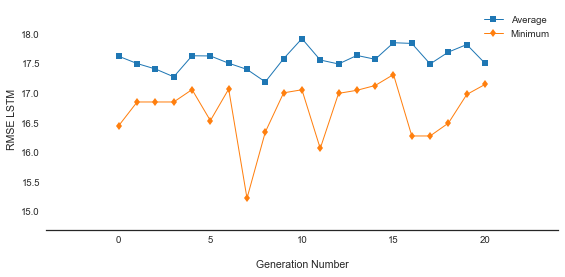

In [37]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.2)  

plt.figure(figsize=(8,4))
avg1,min1,max1=scaler.inverse_transform([avg1,min1,max1])

plt.plot(gen1,avg1,marker='s',linewidth=1,markersize=6,label='Average')
plt.plot(gen1,min1,marker='d',linewidth=1,markersize=6,label='Minimum')
#plt.plot(gen1,max1,marker='*',linewidth=1,markersize=8,label='Maximum')
#plt.tick_params(left=False, labelleft=True)
#plt.box(False)
plt.margins(0.2)


plt.xlabel('Generation Number',labelpad=15)
plt.ylabel('RMSE LSTM')
#plt.xlim(-1, 26)
plt.legend(loc='best');
sns.despine(left=True)
plt.tight_layout()
plt.savefig('Fig1.png', bbox_inches='tight', dpi=400) 
plt.show()

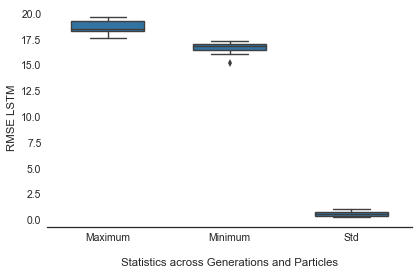

In [35]:
# Box Plot
a,b,c=log.select('min','max','std')

a,b,c=scaler.inverse_transform([a,b,c])

df=pd.DataFrame({'Minimum':a,'Maximum':b, 'Std':c})

plt.figure(figsize=(6,4))
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
sns.boxplot(data=df, width=0.6,color='#1f77b4')
plt.xlabel('Statistics across Generations and Particles',labelpad=15)
plt.ylabel('RMSE LSTM')
sns.despine(left=True)
plt.tight_layout()
plt.show()

### Save Results

In [38]:
a,b,c,d,e=log.select('gen','avg','min','max','std')

b,c,d,e=scaler.inverse_transform([b,c,d,e])
df=pd.DataFrame({'Generation':a,'Average':b, 'Minimum':c,'Maximum':d,'Std':e})
writer = pd.ExcelWriter('GA_Exp1.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [ ]:
best_num_units

In [45]:
tools.selBest(population,5)

[[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]]